In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
class GridWorld:
    def __init__(self, size=5, max_steps=50):
        self.size = size
        self.max_steps = max_steps
        self.start = (0, 0)
        self.goal = (size - 1, size - 1)
        self.reset()

    def reset(self):
        self.agent_pos = list(self.start)
        self.steps = 0
        self.path = [tuple(self.agent_pos)]
        return self.agent_pos

    def step(self, action):
        """Actions: UP, DOWN, LEFT, RIGHT"""
        if action == "UP":
            self.agent_pos[0] = max(0, self.agent_pos[0] - 1)
        elif action == "DOWN":
            self.agent_pos[0] = min(self.size - 1, self.agent_pos[0] + 1)
        elif action == "LEFT":
            self.agent_pos[1] = max(0, self.agent_pos[1] - 1)
        elif action == "RIGHT":
            self.agent_pos[1] = min(self.size - 1, self.agent_pos[1] + 1)

        self.steps += 1
        self.path.append(tuple(self.agent_pos))

        # Reward and termination
        if tuple(self.agent_pos) == self.goal:
            return self.agent_pos, 10, True
        elif self.steps >= self.max_steps:
            return self.agent_pos, -1, True
        else:
            return self.agent_pos, -1, False


In [6]:
def manual_policy(state):
    """Move RIGHT until column 4, then DOWN until row 4"""
    row, col = state
    if col < 4:
        return "RIGHT"
    elif row < 4:
        return "DOWN"
    return None

In [7]:
env = GridWorld()
state = env.reset()
total_reward = 0
done = False

while not done:
    action = manual_policy(state)
    state, reward, done = env.step(action)
    total_reward += reward

print("Episode finished!")
print("Total reward:", total_reward)
print("Path taken:", env.path)

Episode finished!
Total reward: 3
Path taken: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


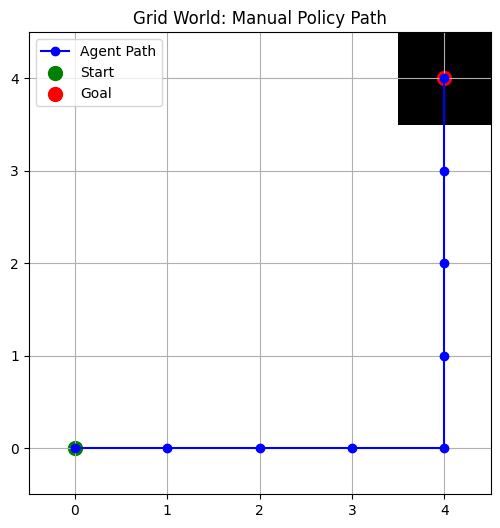

In [8]:
grid = np.zeros((env.size, env.size))

# Mark goal
grid[env.goal] = 2

# Plot grid
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="gray_r")

# Plot agent path
rows = [pos[0] for pos in env.path]
cols = [pos[1] for pos in env.path]
plt.plot(cols, rows, marker="o", color="blue", label="Agent Path")

# Start and goal markers
plt.scatter(0, 0, color="green", s=100, label="Start")
plt.scatter(env.goal[1], env.goal[0], color="red", s=100, label="Goal")

plt.title("Grid World: Manual Policy Path")
plt.xticks(range(env.size))
plt.yticks(range(env.size))
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.show()
